In [18]:
import pandas as pd
from google.colab import drive

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/data_file.csv')

In [20]:
print("Shape: ",df.shape)
print("Columns: ",df.columns)
df

Shape:  (62485, 18)
Columns:  Index(['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA',
       'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize',
       'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
       'ResourceSize', 'BitcoinAddresses', 'Benign'],
      dtype='object')


,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [21]:
df['Benign'].value_counts()

,count
Benign,
0,35367
1,27118


In [22]:
drop_cols = ['FileName', 'md5Hash']

In [23]:
print("df shape : ",df.shape)

df shape :  (62485, 18)


In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,  StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
X = df.drop(columns=['Benign'] + drop_cols)
y = df['Benign']

In [26]:
le = LabelBinarizer()
y_encoded = le.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


 Decision Tree Metrics:
Accuracy : 0.9941585980635352
Precision: 0.9933616079660704
Recall   : 0.9931784660766961
F1 Score : 0.9932700285793307
Confusion Matrix:
 [[7037   36]
 [  37 5387]]

 KNN Metrics:
Accuracy : 0.9920780987436985
Precision: 0.9915082148790844
Recall   : 0.9902286135693216
F1 Score : 0.990868001106909
Confusion Matrix:
 [[7027   46]
 [  53 5371]]

 Random Forest Metrics:
Accuracy : 0.9964791549971993
Precision: 0.9966765140324964
Recall   : 0.9952064896755162
F1 Score : 0.9959409594095942
Confusion Matrix:
 [[7055   18]
 [  26 5398]]


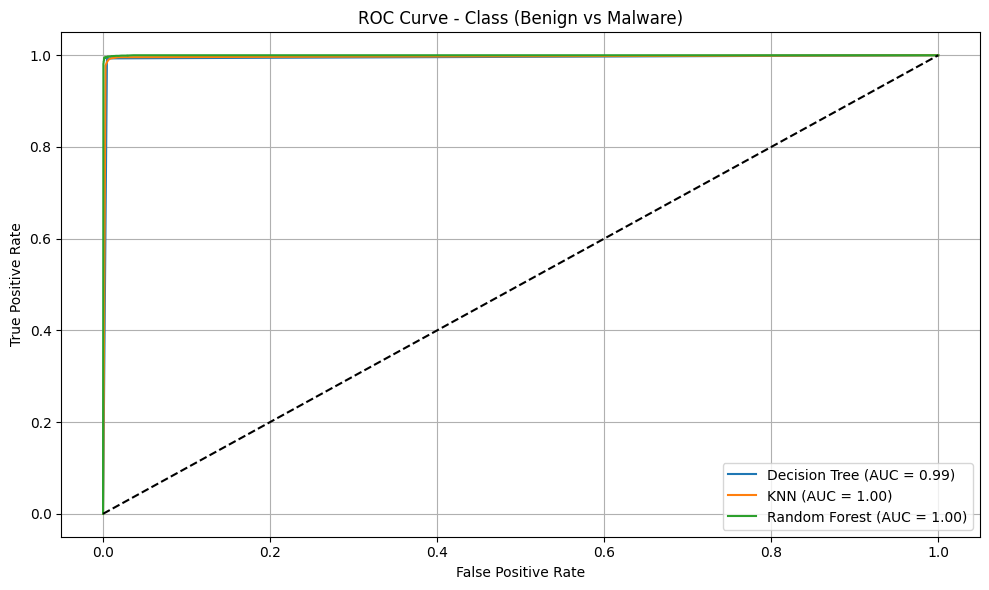

In [31]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train.ravel())
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class (Benign vs Malware)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()